In [1]:
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator
import numpy as np

In [22]:
log_path = ['../tmp/final_tb/llmsac_imgatten_withnoise_PutLetterontheBowlseed0_model_1',
            '../tmp/final_tb/llmsac_imgatten_withnoise_PutLetterontheBowlseed1_model_1',
            '../tmp/final_tb/llmsac_imgatten_withnoise_PutLetterontheBowlseed2_model_1',
            '../tmp/final_tb/llmsac_imgatten_withnoise_PutLetterontheBowlseed3_model_1',
            ]
log_path_counter = ['../tmp/final_tb/llmsac_imgatten_withnoise0.0fixedputblockbowl_model_1']

In [15]:
def calculate_mean_std(data):
    
    lenths = [len(data[key]) for key in data.keys()]
    # with minimum length
    min_len = min(lenths)
    for key in data:
        data[key] = data[key][:min_len]
    steps = [data["seed0"][i][0] for i in range(min_len)]
    mean_std = []
    for idx,step in enumerate(steps):
        values = [data[key][idx][1] for key in data]
        mean_std.append([step, np.mean(values), np.std(values)])
    return mean_std

Text(0.5, 1.0, 'Average Episode Length')

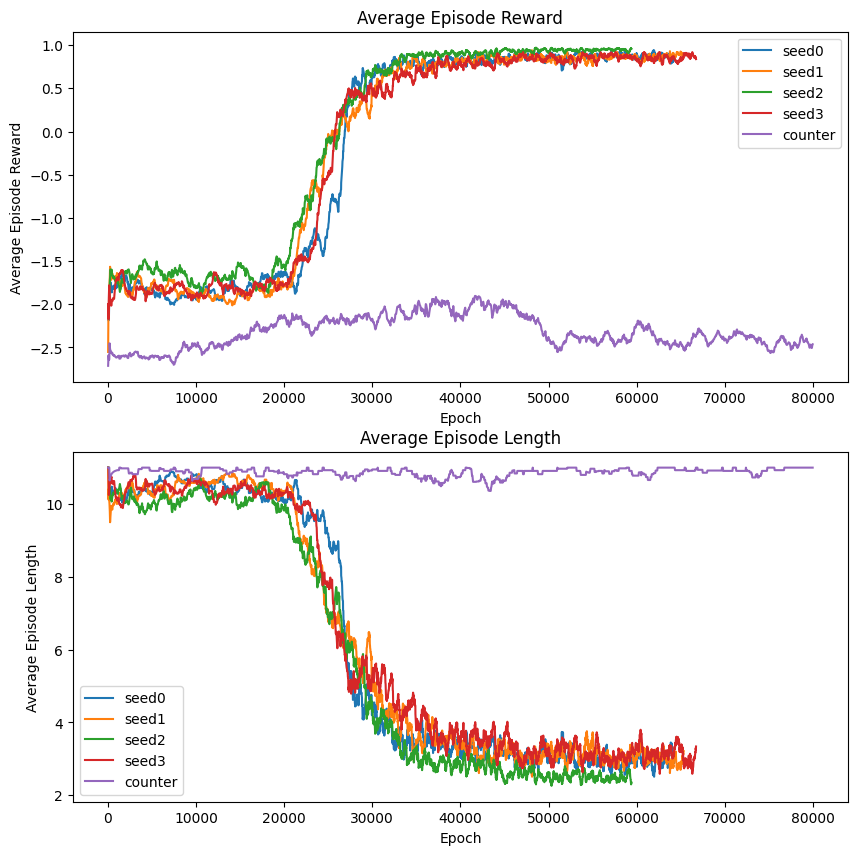

In [23]:
rew = {}
lenth = {}
rew_tag = 'rollout/ep_rew_mean'
len_tag = 'rollout/ep_len_mean'
for seed in range(4):
    accumulator = event_accumulator.EventAccumulator(log_path[seed])
    accumulator.Reload()
    key = 'seed'+str(seed)
    _rew = accumulator.Scalars(rew_tag)
    _len = accumulator.Scalars(len_tag)
    rew[key] = [[i.step, i.value] for i in _rew]
    lenth[key] = [[i.step, i.value] for i in _len]

mean_std_rew = calculate_mean_std(rew)
mean_std_len = calculate_mean_std(lenth)

counter = event_accumulator.EventAccumulator(log_path_counter[0])
counter.Reload()
_rew_c = counter.Scalars(rew_tag)
rew_c = [[i.step, i.value] for i in _rew_c]
_len_c = counter.Scalars(len_tag)
len_c = [[i.step, i.value] for i in _len_c]

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
for seed in range(4):
    key = 'seed'+str(seed)
    plt.plot([i[0] for i in rew[key]], [i[1] for i in rew[key]], label=key)
plt.plot([i[0] for i in rew_c], [i[1] for i in rew_c], label='counter')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Average Episode Reward')
plt.title('Average Episode Reward')
plt.subplot(2, 1, 2)
for seed in range(4):
    key = 'seed'+str(seed)
    plt.plot([i[0] for i in lenth[key]], [i[1] for i in lenth[key]], label=key)
plt.plot([i[0] for i in len_c], [i[1] for i in len_c], label='counter')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Average Episode Length')
plt.title('Average Episode Length')




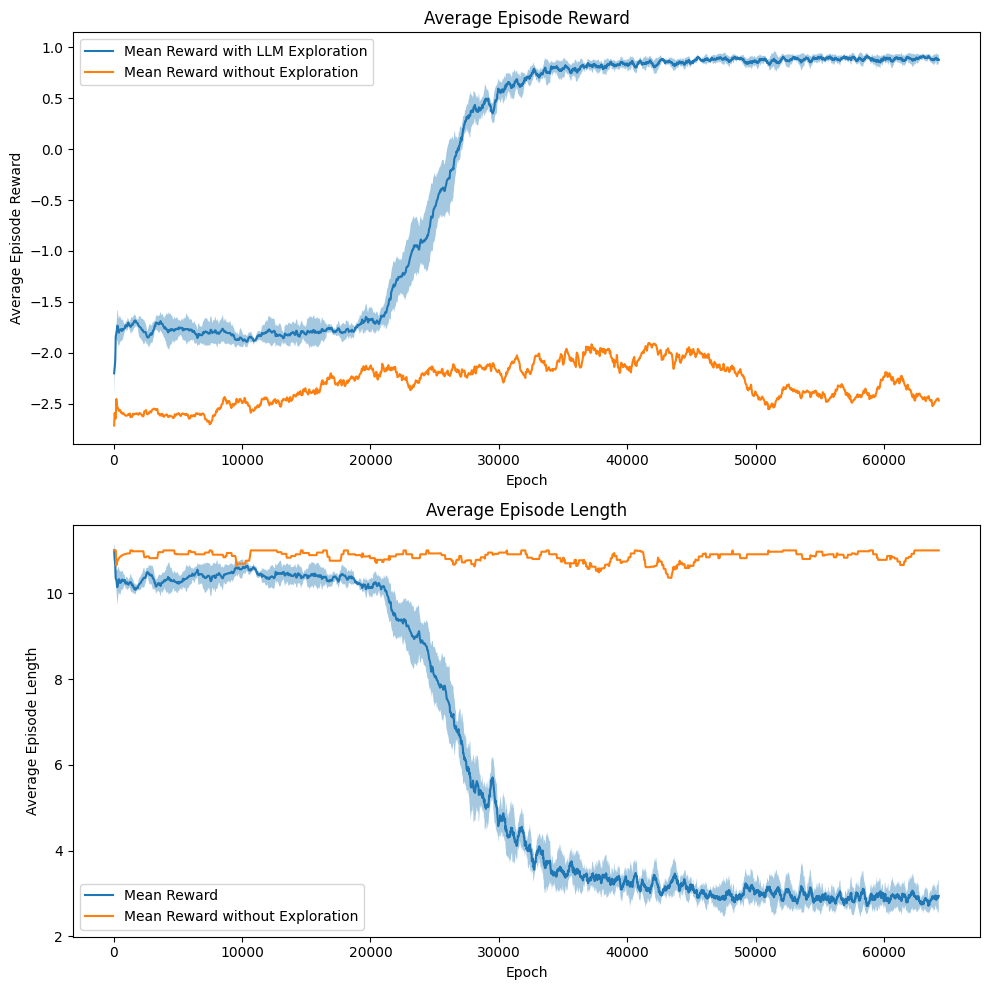

In [30]:
# Plot for rewards
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)

steps, means, stds = zip(*mean_std_rew)

plt.plot(steps, means, label='Mean Reward with LLM Exploration')
plt.fill_between(steps, np.array(means) - np.array(stds), np.array(means) + np.array(stds), alpha=0.4)
max_step = steps[-1]
c_steps = [rew_c[i][0] for i in range(len(rew_c)) if rew_c[i][0] <= max_step]
C_rewards = [rew_c[i][1] for i in range(len(rew_c)) if rew_c[i][0] <= max_step]
plt.plot(c_steps, C_rewards, label='Mean Reward without Exploration')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Average Episode Reward')
plt.title('Average Episode Reward')

# Plot for lengths
plt.subplot(2, 1, 2)
steps, means, stds = zip(*mean_std_len)
plt.plot(steps, means, label='Mean Reward')
plt.fill_between(steps, np.array(means) - np.array(stds), np.array(means) + np.array(stds), alpha=0.4)
max_step = steps[-1]
c_steps = [len_c[i][0] for i in range(len(len_c)) if len_c[i][0] <= max_step]
C_lengths = [len_c[i][1] for i in range(len(len_c)) if len_c[i][0] <= max_step]
plt.plot(c_steps, C_lengths, label='Mean Reward without Exploration')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Average Episode Length')
plt.title('Average Episode Length')

plt.tight_layout()
plt.show()